In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torchvision.transforms as transforms

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [ ]:
import zipfile
import os


zip_path = '/content/drive/MyDrive/lung_data/NLM-MontgomeryCXRSet (1).zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

print("Dataset unzipped successfully!")

Dataset unzipped successfully!


In [42]:
#remove this .ipynb_checkpoints file to train the model properly

!rm -r /content/dataset/MontgomerySet/CXR_png/.ipynb_checkpoints
!rm -r /content/dataset/MontgomerySet/ManualMask/leftMask/.ipynb_checkpoints


rm: cannot remove '/content/dataset/MontgomerySet/CXR_png/.ipynb_checkpoints': No such file or directory
rm: cannot remove '/content/dataset/MontgomerySet/ManualMask/leftMask/.ipynb_checkpoints': No such file or directory


In [ ]:
import os

extract_dir = '/content/dataset'
for root, dirs, files in os.walk(extract_dir):
    print(f"{root} has {len(files)} files")


/content/dataset has 0 files
/content/dataset/MontgomerySet has 2 files
/content/dataset/MontgomerySet/ClinicalReadings has 138 files
/content/dataset/MontgomerySet/ManualMask has 1 files
/content/dataset/MontgomerySet/ManualMask/rightMask has 138 files
/content/dataset/MontgomerySet/ManualMask/leftMask has 138 files
/content/dataset/MontgomerySet/CXR_png has 138 files
/content/dataset/__MACOSX has 0 files
/content/dataset/__MACOSX/MontgomerySet has 2 files
/content/dataset/__MACOSX/MontgomerySet/ManualMask has 1 files
/content/dataset/__MACOSX/MontgomerySet/ManualMask/leftMask has 1 files
/content/dataset/__MACOSX/MontgomerySet/CXR_png has 1 files


In [ ]:
def load_image_and_mask(image_name):

    image_path = f"/content/dataset/MontgomerySet/CXR_png/{image_name}"
    left_mask_path = f"/content/dataset/MontgomerySet/ManualMask/leftMask/{image_name}"
    right_mask_path = f"/content/dataset/MontgomerySet/ManualMask/rightMask/{image_name}"



    image = Image.open(image_path).convert("L")
    left_mask = Image.open(left_mask_path).convert("L")
    right_mask = Image.open(right_mask_path).convert("L")

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

    img_tensor = transform(image)
    left_mask_tensor = transform(left_mask)
    right_mask_tensor = transform(right_mask)


    combined_mask = (left_mask_tensor + right_mask_tensor) > 0
    combined_mask = combined_mask.float()

    return img_tensor, combined_mask


In [ ]:
class DummyUNet(nn.Module):
    def __init__(self):
        super(DummyUNet, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 8, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(8, 1, 1)

    def forward(self, x):
        return torch.sigmoid(self.conv(x))


predicted

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DummyUNet().to(device)

image_name = "MCUCXR_0001_0.png"
img_tensor, true_mask = load_image_and_mask(image_name)

model.eval()
with torch.no_grad():
    input_tensor = img_tensor.unsqueeze(0).to(device)
    pred_mask = model(input_tensor)
    pred_mask = pred_mask.squeeze().cpu().numpy() > 0.5


visual

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_tensor.squeeze(), cmap="gray")
plt.title("X-ray")

plt.subplot(1, 3, 2)
plt.imshow(true_mask.squeeze(), cmap="Reds", alpha=0.6)
plt.title("Ground Truth Mask")

plt.subplot(1, 3, 3)
plt.imshow(img_tensor.squeeze(), cmap="gray")
plt.imshow(pred_mask, cmap="Blues", alpha=0.5)
plt.title("Predicted Overlay")

plt.tight_layout()
plt.show()


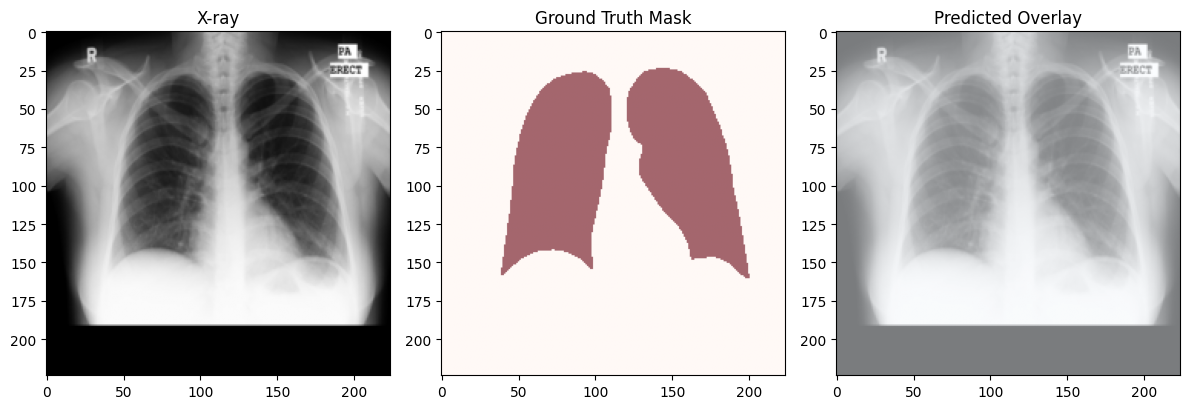

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_tensor.squeeze(), cmap="gray")
plt.title("X-ray")

plt.subplot(1, 3, 2)
plt.imshow(true_mask.squeeze(), cmap="Reds", alpha=0.6)
plt.title("Ground Truth Mask")

plt.subplot(1, 3, 3)
plt.imshow(img_tensor.squeeze(), cmap="gray")
plt.imshow(pred_mask, cmap="Blues", alpha=0.5)
plt.title("Predicted Overlay")

plt.tight_layout()
plt.show()